# <span style='color:#0099CC'>Clustering Assignment

## <span style='color:#0099CC'> Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <span style='color:#0099CC'>Read the Data:

In [3]:
# Country-data.csv file is read using read_csv function
countries_df = pd.read_csv('Country-data.csv')

In [4]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Checking the shape of the data set

In [5]:
countries_df.shape

(167, 10)

## <span style='color:#0099CC'> Attribute Information

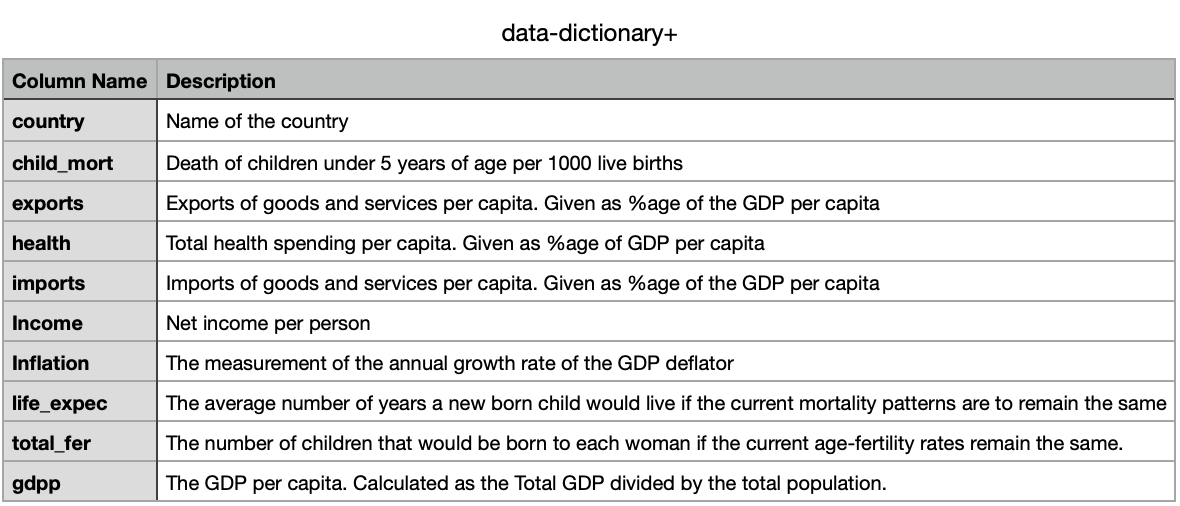

To view the summary of the dataframe `countries_df`

In [6]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


From the above output it is inferred that the columns are of correct datatype and there are no null entries in the dataframe. Just to make sure, checking any missing values in each column

In [7]:
countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

From the attributes information, the three columns `exports`, `health` and `imports` are given in percentage of column `gdpp`. Since the distance metric used in clustering process is Euclidean distance, it is necessary to bring all the attributes on the same scale. Hence let's convert these columns from percentage to GDPP.

In [8]:
columns_in_percenatge = ['exports','health','imports']
for column in columns_in_percenatge:
    countries_df[column] = countries_df['gdpp'] * countries_df[column] / 100

In [9]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### <span style='color:#0099CC'> To check whether any duplicate country rows are present

From the problem statement, it is clear that ,we need to catgeroize the countries, it is important to have the unique counrty names in the data set.Let's check , whether the country names are unique.

- `country` column is assigned to a `temp_country` variable
- The country names in the series are converetd to upper case  and assigned to same variable(`temp_country`)
- The length of the `temp_country` should be equal to length of the set `temp_country`.

In [10]:
temp_country = countries_df['country']

In [11]:
for i in range(len(temp_country)):
    temp_country[i] = str.upper(temp_country[i])

In [12]:
len(temp_country) == len(set(temp_country))

True

### <span style='color:#0099CC'> Descriptive Statistics

Descriptive statistics of each feature is found to understand the quirks. This is achieved using `describe` method.

In [13]:
countries_df.describe().round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,7420.62,1056.73,6588.35,17144.69,7.78,70.56,2.95,12964.16
std,40.33,17973.89,1801.41,14710.81,19278.07,10.57,8.89,1.51,18328.70
min,2.60,1.08,12.82,0.65,609.00,-4.21,32.10,1.15,231.00
25%,8.25,447.14,78.54,640.21,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,1777.44,321.89,2045.58,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,7278.00,976.94,7719.60,22800.00,10.75,76.80,3.88,14050.00
max,208.00,183750.00,8663.60,149100.00,125000.00,104.00,82.80,7.49,105000.00


## <span style='color:#0099CC'>Data Exploration

#### Univariate Analysis

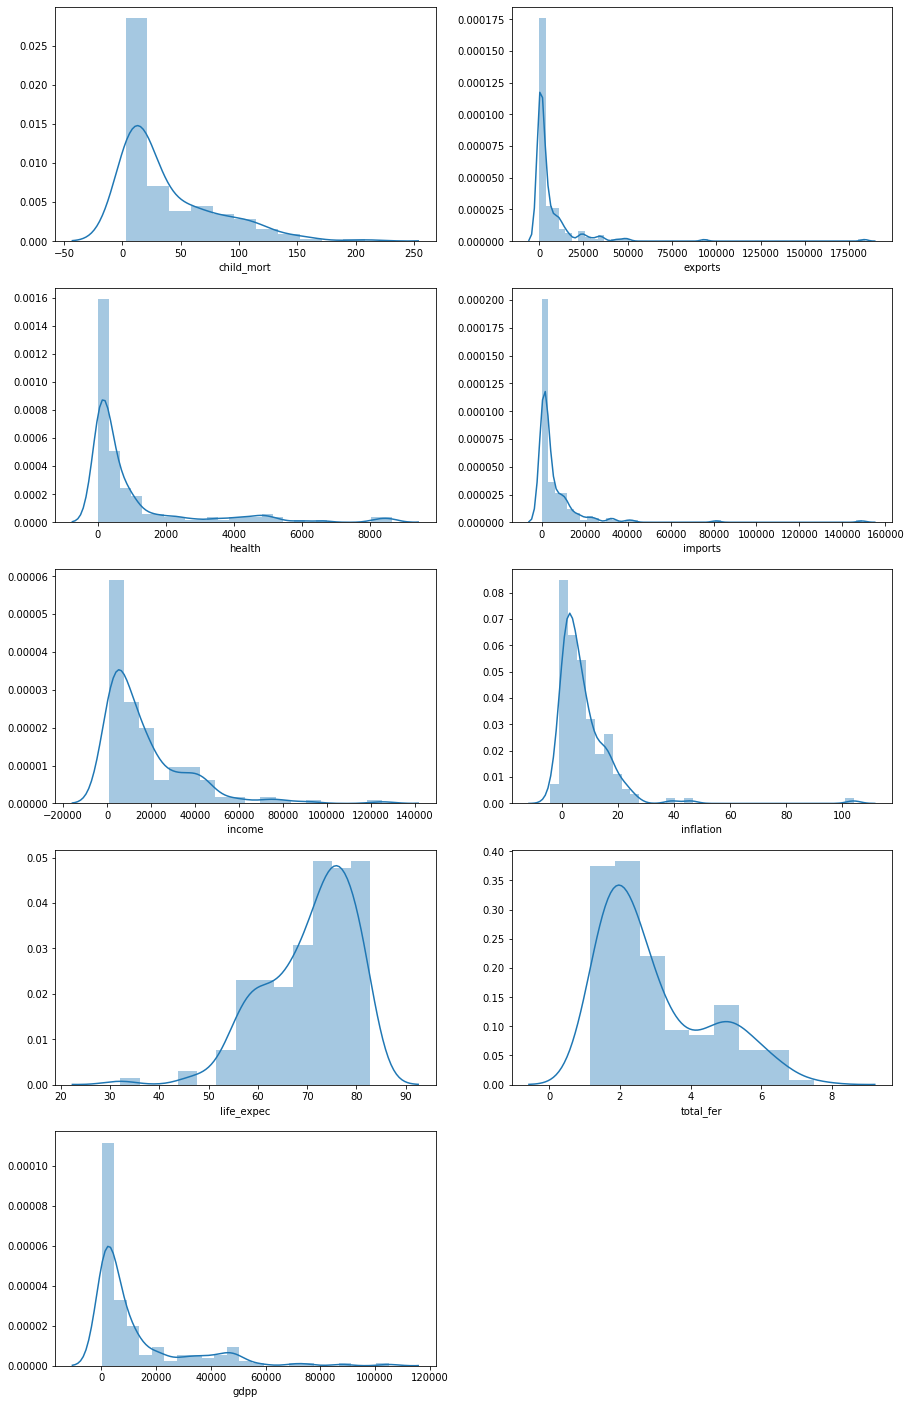

In [14]:
columns = countries_df.columns[1:]
plt.figure(figsize=(15,25))
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(countries_df[i[1]]) 
plt.show()

From the above plots , it is inferred that:
- `child_mort` : For most of the countries, the death of the children Under age 5 are less than 50 per 1000 live births. The column is a right skewed distribution.
- `exports` : The exports of goods is right skewed.
- `health` : The health follows a right skewed distribution with the rise and fall at the end of the tail.
- `Imports` : This column follows a distribution of Right skewed with a long tail.
- `Income` : The net income per person is right-skewed.
- `Inflation` : The annual growth of the total GDP is normalised with a long tail
- `life_expec` : The life expectancy is right skewed.
- `total_fer` : The number of children that would be born to each woman if the current age-fertility rates remain the same, is right skewed with two rise and fall.
- `gdpp` : The GDP per capita is right skewed, many countries.

#### Bivariate Analysis

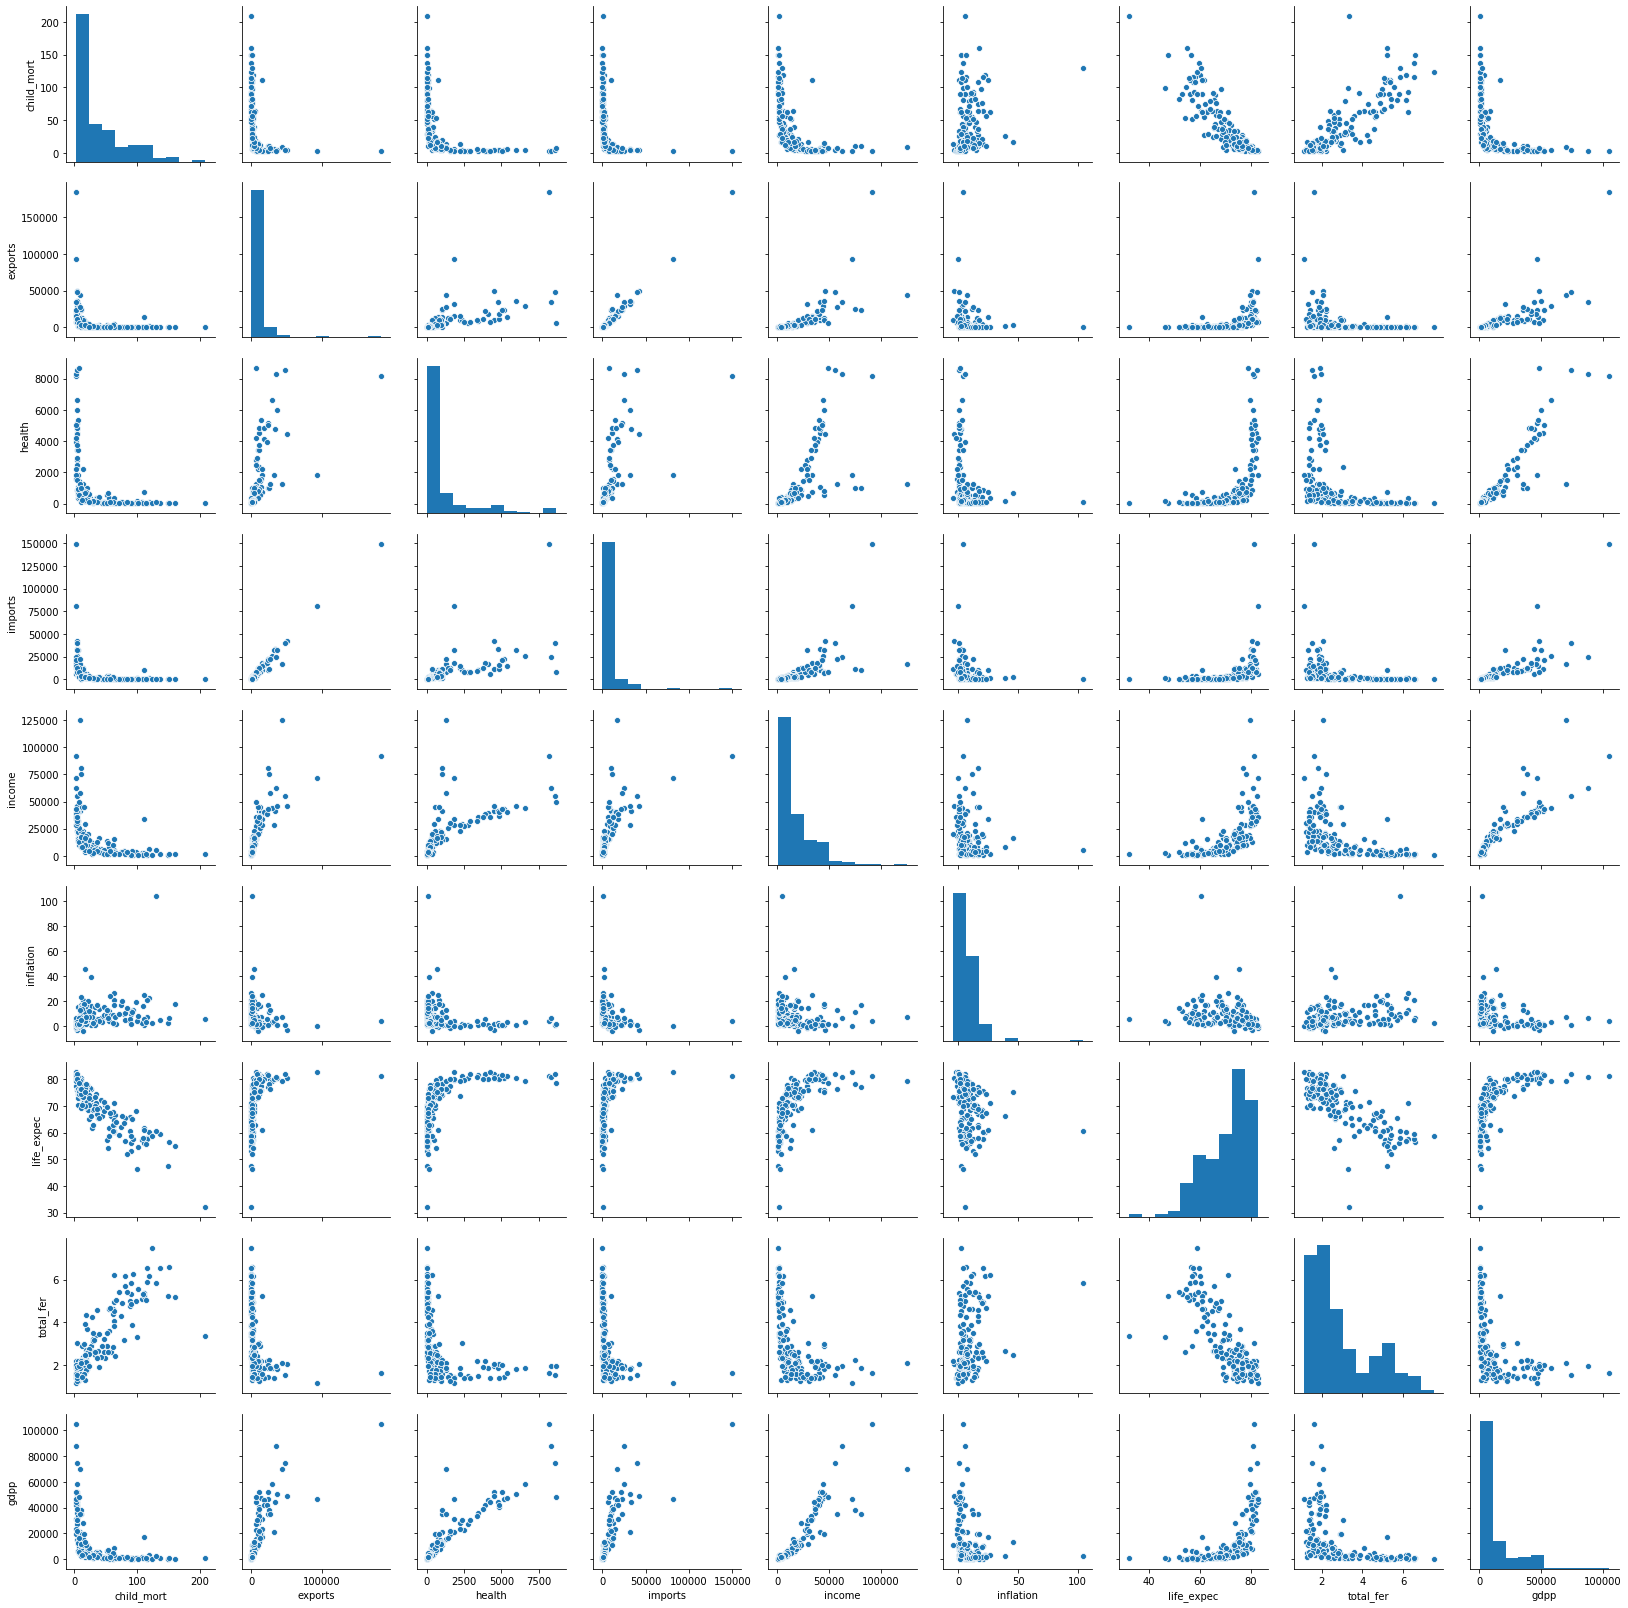

In [15]:
sns.pairplot(countries_df)
plt.show()

# <span style='color:#0099CC'>Outliers

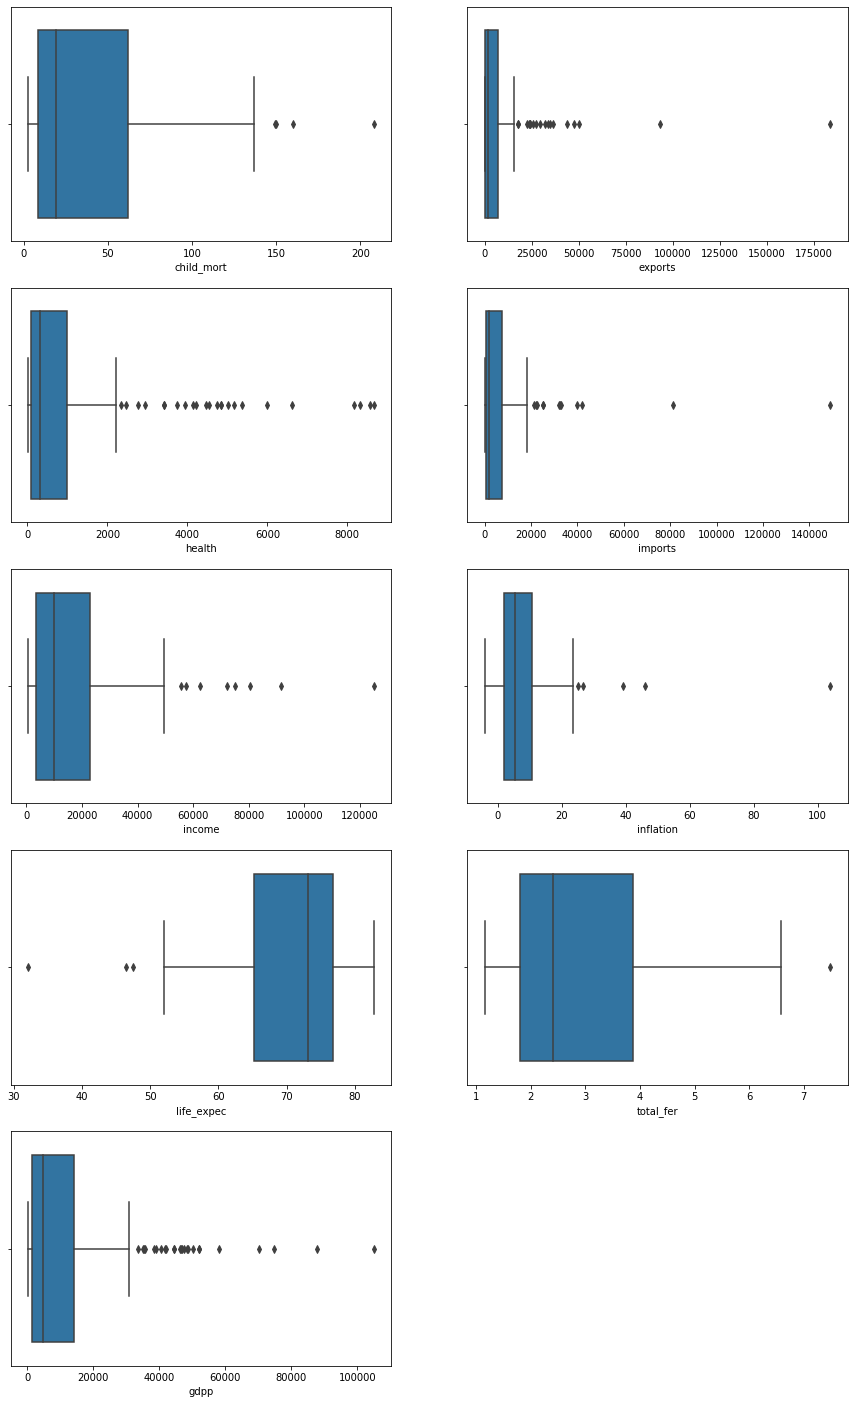

In [16]:
columns = countries_df.columns[1:]
plt.figure(figsize=(15,25))
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(countries_df[i[1]]) 
plt.show()

Handling the outliers is vital in clustering, as K-Means algorithm tries to assign every point in the dataset to a cluster, thus the outlier value pull the cluster center towards themselves and thus affect the optimal cluster formation. In this scenario we cannot drop the observations as we will drop the information about the country. Hence we need to use capping with low range to handle the outliers.

As the problem statement is choosing the countries that are in the direst need of aid using socio-economic and health factors that determine the overall development of the country. It is important to handle the outliers based on this.
- The columns where we need to handle the lower range and should ignore the upper range outliers are `child_mort` and `inflation`.
- The columns where we need to handle the upper range and should ignore the lower range outliers are `exports`, `health`, `imports`, `income`, `life_expec`, `total_fer` and `gdpp`.
- Since the columns `child_mort`, `inflation` have no lower range outliers. We are not dealing with these columns.

In [18]:
countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

For the columns `exports`, `health`, `imports`, `income`, `life_expec`, `total_fer` and `gdpp` the values above 0.95 quantile are replaced with 0.95 quantile respectively.

In [19]:
upper_range_cols = ['exports','health','imports','income','life_expec','total_fer', 'gdpp']
for col in upper_range_cols:
    q3 = countries_df[col].quantile(0.95)
    countries_df[col][countries_df[col]>= q3] = q3

### <span style='color:#0099CC'>Scaling the varibles

For easy interpretation and optimisation of the model, the numerical variables in the data set  are scaled using standard scaler.

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [21]:
# Getting the mumeric columns
numeric_columns = countries_df.columns[1:]
#intialising 
scaler = StandardScaler()

#fit_transform is used to learn the standard scaler in the data set and then transform
countries_df_scaled = scaler.fit_transform(countries_df[numeric_columns])


In [22]:
countries_df_scaled

array([[ 1.29153238, -0.66958102, -0.62943544, ..., -1.62318027,
         2.01642065, -0.75736169],
       [-0.5389489 , -0.54217181, -0.47348864, ...,  0.65482341,
        -0.88053487, -0.52332107],
       [-0.27283273, -0.47583812, -0.53001667, ...,  0.67749012,
        -0.01909006, -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.59652699, ...,  0.29215616,
        -0.6721208 , -0.70727157],
       [ 0.44841668, -0.63010392, -0.61153387, ..., -0.34251153,
         1.21750006, -0.70727157],
       [ 1.11495062, -0.61289625, -0.59901824, ..., -2.09918104,
         1.72464096, -0.69734618]])

In [23]:
# Converting the arrays to a dataframe
countries_df_scaled = pd.DataFrame(countries_df_scaled)

In [24]:
countries_df_scaled.columns = countries_df.columns[1:]
countries_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


### <span style='color:#0099CC'> Hopkins Statistics

Before applying the clustering algorithm, it is vital to check whether the data has some meaningful clusters or not, this is achived using the hopkins statistics.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(countries_df_scaled)

0.8840967361913192

From the above score it is clear that the data points have high tendency of cluster.

## <span style='color:#0099CC'> KMEANS Clustering

#### Finding the optimal number of clusters, this can be found using two ways:

1. **Sum of Squared Distance (SSD)** :
The distance between the data points and it's cluster center should be minimum. This distance is found using SSD. If the data points are very close to the centroid then the cost function SSD is low and the clusters formed are good.

In [27]:
from sklearn.cluster import KMeans

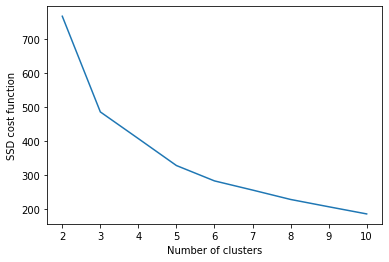

In [28]:
# elbow-curve/SSD
ssd = []
# Here: 10 is the maximum clusters, since more than 10 would be complex for the business.
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
for num_clusters in range_n_clusters:
    kmeans_var = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans_var.fit(countries_df_scaled)
    ssd.append(kmeans_var.inertia_)
    
# Plot the ssds for each of the n_clusters
x = np.array([0,1,2,3,4,5,6,7,8])
plt.plot(ssd)
plt.xticks(x,range_n_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('SSD cost function')
plt.show()

From the elbow curve , it is inferred that the cluster 3 showns an elbow, which means that from cluster=2 to cluster=3 there is a significant drop and then the drop is gradual.

2. **Silhouette Analysis**:
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette_score_array = []
for num_clusters in range_n_clusters:
    #intialising the KMEANS
    kmeans_var = KMeans(n_clusters=num_clusters, max_iter=50)
    #Fiting the model on the data
    kmeans_var.fit(countries_df_scaled)
    
    #To know which data points belongs to which cluster
    cluster_labels = kmeans_var.labels_
    
    #silhouette score for each range_n_clusters
    silhouette_avg = silhouette_score(countries_df_scaled, cluster_labels)
    # Appending each silhoutte score to the array
    silhouette_score_array.append(silhouette_avg)
    print("For number of clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For number of clusters=2, the silhouette score is 0.49332771241764917
For number of clusters=3, the silhouette score is 0.43364324781598373
For number of clusters=4, the silhouette score is 0.4372152014491519
For number of clusters=5, the silhouette score is 0.41112966940789314
For number of clusters=6, the silhouette score is 0.3069398488745048
For number of clusters=7, the silhouette score is 0.3168417398645303
For number of clusters=8, the silhouette score is 0.3202652949867332
For number of clusters=9, the silhouette score is 0.2816083932776294
For number of clusters=10, the silhouette score is 0.2829892121399389


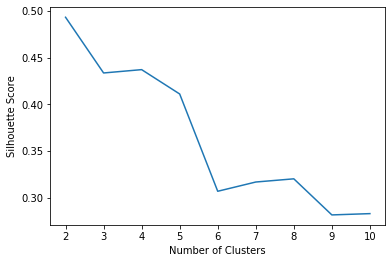

In [31]:
# Silhouette Analysis
plt.plot(range_n_clusters, silhouette_score_array)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

From the output and the plot, the silhouette score is highest for cluster = 2,with a value of **0.49** and the second highest is for cluster = 3 with a value of **0.433**.

#### From the above two analysis: SSD and silhouette , we can consider cluster = 3.

In [32]:
# final model with k=3
kmeans_var = KMeans(n_clusters=3, max_iter=50)
kmeans_var.fit(countries_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans_var.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

From the dataframe `countries_df`, except **country** column, the numeric columns are copied to `countries_df_scaled` and the dataframe is scaled, now let's add the **KMeans labels** to the unscaled data frame , as this would help us for cluster profiling.

In [34]:
# Adding the cluster labels to the data frame
countries_df['cluster_id'] = kmeans_var.labels_
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,AFGHANISTAN,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,0
1,ALBANIA,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1
2,ALGERIA,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1
3,ANGOLA,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,0
4,ANTIGUA AND BARBUDA,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1


In [35]:
countries_df['cluster_id'].value_counts()

1    82
0    48
2    37
Name: cluster_id, dtype: int64

From the value counts the distribution of data points to a cluster is not concentrated only on one cluster and none of the clusters have very less data points, this implies that clustering is done well.

# <span style='color:#0099CC'> Cluster Profiling
Given : Need to analyse the clusters with respect to 
- `gdpp`
- `child_mort`
- `income`
<br/>Thus, cluster profiling is done using these 3 columns.

#### <span style='color:#0099CC'> Clusters formation with respect to `gdpp` vs `child_mort`

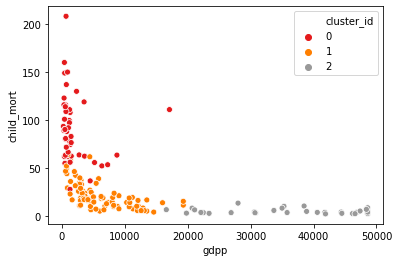

In [36]:
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id', 
                data=countries_df, palette='Set1')
plt.show()


- Cluster 0 represents the countries with low `gdpp` and high `child_mort`.
- Cluster 1 represents the countries with avergae `gdpp` and average `child_mort`.
- Cluster 2 represnets the countries with high `gdpp` and low `child_mort`

#### <span style='color:#0099CC'> Clusters formation with respect to `gdpp` vs `income`

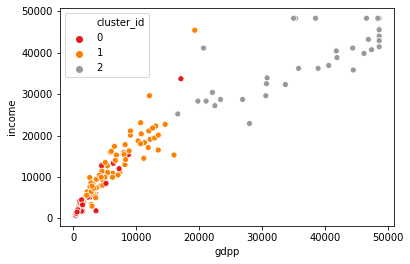

In [37]:
sns.scatterplot(x='gdpp', y='income', hue='cluster_id', 
                data=countries_df, palette='Set1')
plt.show()


- Cluster 0 majorly represents the countries with low `gdpp` and low `income`.
- Cluster 1 represents the countries with average `gdpp` and average `income`.
- Cluster 2 represnets the countries with high `gdpp` and high `income`

#### <span style='color:#0099CC'> Clusters formation with respect to `child_mort` vs `income`

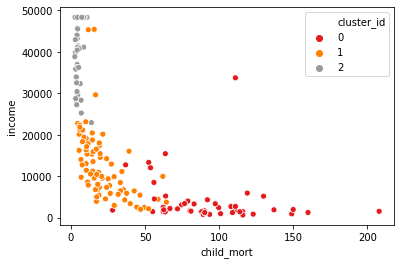

In [38]:
sns.scatterplot(x='child_mort', y='income', hue='cluster_id', 
                data=countries_df, palette='Set1')
plt.show()


- Cluster 0 majorly represents the countries with high `child_mort` and low `income`.
- Cluster 1 represents the countries with low `child_mort` and average `income`.
- Cluster 2 represnets the countries with low `child_mort` and high `income`

Hence, from the above 3 plots it is inferred that the cluster 0 represents the countries which are in direst need of aid.

In [39]:
countries_df['cluster_id'].head()

0    0
1    1
2    1
3    0
4    1
Name: cluster_id, dtype: int32

In [40]:
countries_df[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,1909.208333,91.610417,3897.354167
1,6287.463415,21.951220,12304.756098
2,37745.675676,5.237838,38711.081081


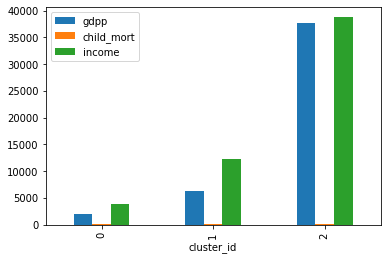

In [41]:
countries_df[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()

In [42]:
direst_need_countries = countries_df[countries_df['cluster_id'] == 0]

In [43]:
direst_need_countries.sort_values(by = ['gdpp', 'child_mort', 'income'], 
                                  ascending = [True, False, True]).head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,BURUNDI,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,0
88,LIBERIA,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,0
37,"CONGO, DEM. REP.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,0
112,NIGER,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,0
132,SIERRA LEONE,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,0


# <span style='color:#0099CC'>Hierarchical Clustering

One of the major consideratins in using the K-Means algorithm is deciding the value of K before hand, this restriction is avoided using the Hierarchical clustering.

In [44]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [45]:
countries_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


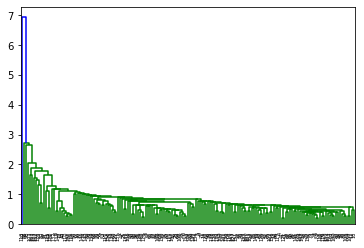

In [46]:
#Single linkage method
mergings = linkage(countries_df_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

The single linkage doesn't produce a good result to analyse the clusters, Hence we need to try the complete linkage method and analyse the clusters.

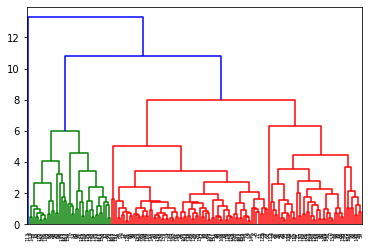

In [47]:
#Complete linkage method
mergings = linkage(countries_df_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

From the KMeans SSD cost function and silhouette score, we got to know that K=3 gives the optimal clusters. Hence if we divide the dendrogram at dismilarity of 10, we will get 3 clusters.

In [48]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

The output is an array and each element of an array is inside an array. This can be confirmed by finding the shape.

In [49]:
cut_tree(mergings, n_clusters=3).shape

(167, 1)

As we need a series of shape (167,), let's reshape.

In [50]:
# Reshaping the cluster labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [51]:
#Assign the cluster labels to the data frame
countries_df['Hierarchical_cluster_labels'] = cluster_labels
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierarchical_cluster_labels
0,AFGHANISTAN,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,0,0
1,ALBANIA,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1,0
2,ALGERIA,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1,0
3,ANGOLA,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,0,0
4,ANTIGUA AND BARBUDA,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1,0


In [52]:
countries_df['Hierarchical_cluster_labels'].value_counts()

0    125
1     41
2      1
Name: Hierarchical_cluster_labels, dtype: int64

In [53]:
countries_df[countries_df['Hierarchical_cluster_labels']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierarchical_cluster_labels
113,NIGERIA,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330,0,2


From the above output , only one observation belongs to cluster 2. Let's drop this outlier and rerun the Hierarchical clustering.

In [54]:
countries_df = countries_df[countries_df.index != 113]
countries_df_scaled = countries_df_scaled[countries_df_scaled.index != 113]

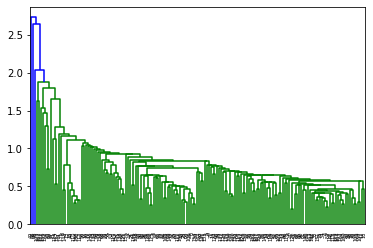

In [55]:
#Single linkage method
mergings = linkage(countries_df_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

The single linkage doesn't produce a good result to analyse the clusters, Hence we need to try the complete linkage method and analyse the clusters.

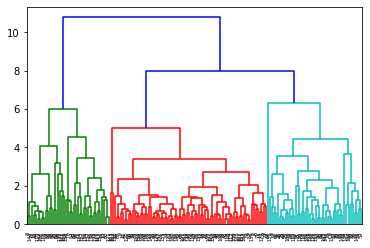

In [56]:
#Complete linkage method
mergings = linkage(countries_df_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [57]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
    

In [58]:
# Reshaping the cluster labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [59]:
#Assign the cluster labels to the data frame
countries_df['Hierarchical_cluster_labels'] = cluster_labels
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierarchical_cluster_labels
0,AFGHANISTAN,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,0,0
1,ALBANIA,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1,1
2,ALGERIA,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1,1
3,ANGOLA,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,0,0
4,ANTIGUA AND BARBUDA,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1,1


In [60]:
countries_df['Hierarchical_cluster_labels'].value_counts()

1    78
0    47
2    41
Name: Hierarchical_cluster_labels, dtype: int64

The number of data points in each cluster is distributed well, so the K value is good.

## <span style='color:#0099CC'> Cluster Profiling

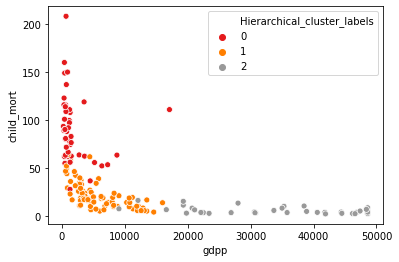

In [61]:
sns.scatterplot(x='gdpp', y='child_mort', hue='Hierarchical_cluster_labels', 
                data=countries_df, palette='Set1')
plt.show()


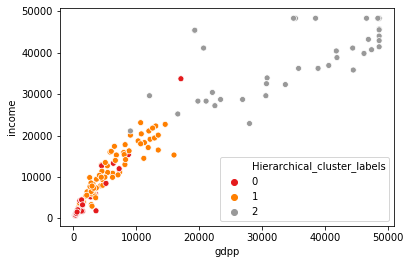

In [62]:
sns.scatterplot(x='gdpp', y='income', hue='Hierarchical_cluster_labels', 
                data=countries_df, palette='Set1')
plt.show()


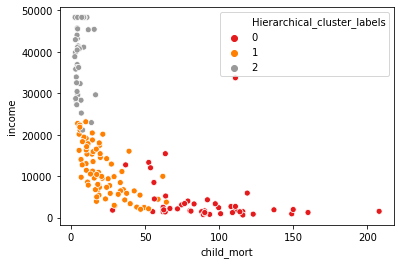

In [63]:
sns.scatterplot(x='child_mort', y='income', hue='Hierarchical_cluster_labels', 
                data=countries_df, palette='Set1')
plt.show()


In [64]:
countries_df[['gdpp', 'child_mort', 'income','Hierarchical_cluster_labels']].groupby('Hierarchical_cluster_labels').mean()




,gdpp,child_mort,income
Hierarchical_cluster_labels,,,
0,1900.255319,90.793617,3870.702128
1,5843.615385,22.411538,11122.948718
2,35520.975610,5.992683,38383.170732


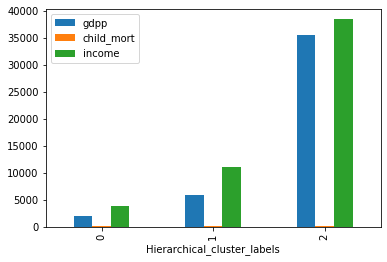

In [65]:
countries_df[['gdpp', 'child_mort', 'income','Hierarchical_cluster_labels']].groupby('Hierarchical_cluster_labels').mean().plot(kind='bar')
plt.show()



From the above outputs , it is clear that the cluster = 0 represent the countries that are in direst needs of aid. Hence the subset of data belongs to cluster 0 is created as `direst_need_countries_hier`.

In [66]:
direst_need_countries_hier = countries_df[countries_df['cluster_id'] == 0]

To get the top 5 countries the dataframe is sorted ascending with respect to `gdpp` and `income` and descending with respect to `child_mort` columns respectively.

In [67]:
direst_need_countries_hier.sort_values(by = ['gdpp', 'child_mort', 'income'], 
                                  ascending = [True, False, True]).head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierarchical_cluster_labels
26,BURUNDI,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,0,0
88,LIBERIA,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,0,0
37,"CONGO, DEM. REP.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,0,0
112,NIGER,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,0,0
132,SIERRA LEONE,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,0,0


After comparing the top 5 countries from the KMeans and hierarchical clustering , it is clear that the 5 countries are same.<br/>
Thus top 5 countries that are in direst needs of aid based on hierarchical clustering considering socio-economic and health factors that determine the overall development of the country are:
- BURUNDI
- LIBERIA
- Congo, Dem. Rep.
- NIGER
- SIERRA LEONE
